In [2]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import scipy
from scipy import interpolate
import pandas as pd
import itertools
from root_numpy import root2array, root2rec, tree2rec, array2root
from ROOT import TChain

In [3]:
#rec1 = root2array("/Users/vgenty/git/LARLITE/UserDev/MichelReco/MichelCluster/ana.root","out_tree")
rec1 = root2array("/Users/vgenty/git/LARLITE/UserDev/MichelReco/MichelCluster/ana.root","out_tree")
df_michel = pd.DataFrame(rec1)

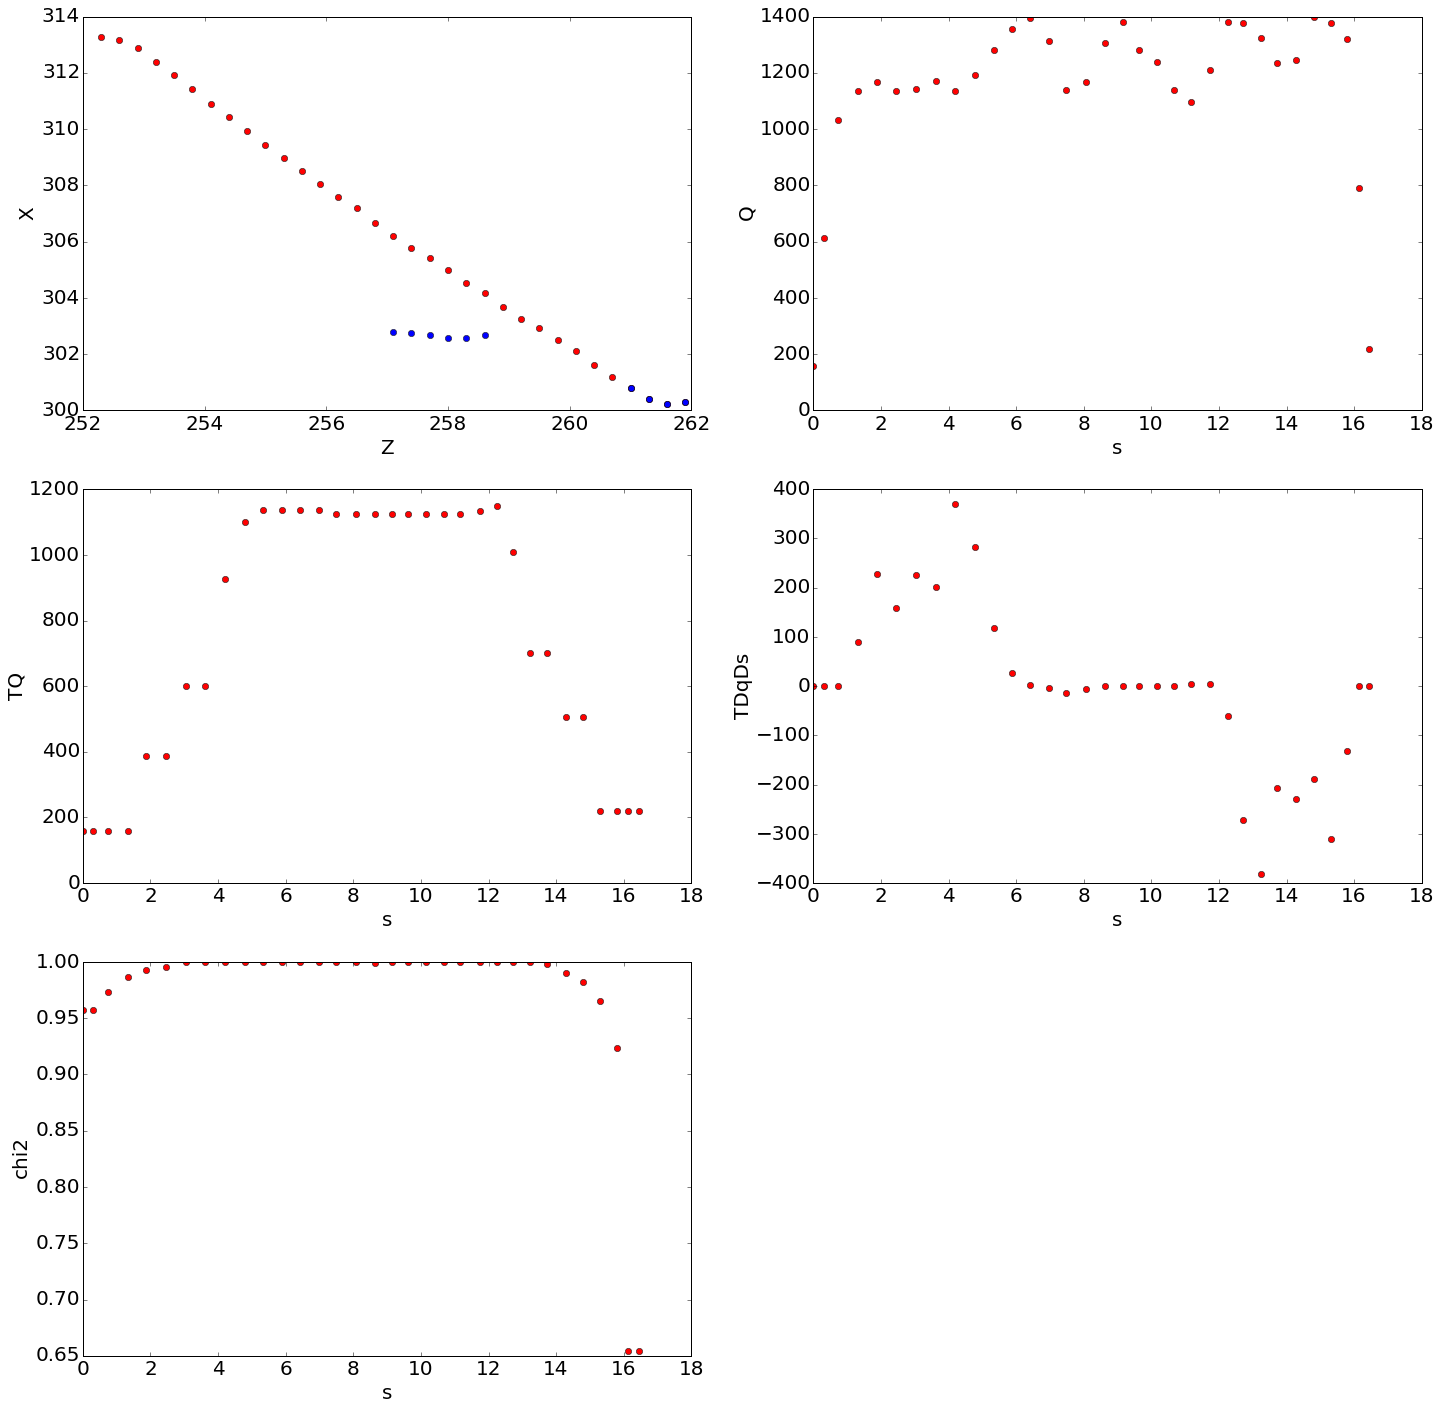

In [37]:
k = 78

df_event = df_michel.iloc[[k]]

plt.figure(figsize=(24,24))

plt.subplot(3,2,1)

plt.plot(np.array(df_event["_Z"])[0],
         np.array(df_event["_X"])[0],
         "ro",color="r")
plt.plot(np.array(df_event["_michel_Z"])[0],
         np.array(df_event["_michel_X"])[0],
         "ro",color="b")

plt.xlabel('Z',fontsize=20)
plt.ylabel('X',fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(3,2,2)
plt.plot(np.array(df_event["_s_v"])[0],
         np.array(df_event["_q_v"])[0],
         "ro",color="r")
plt.xlabel('s' ,fontsize=20)
plt.ylabel('Q',fontsize=20)
plt.tick_params(labelsize=20)


plt.subplot(3,2,3)
plt.plot(np.array(df_event["_s_v"])[0],
         np.array(df_event["_t_q_v"])[0],
         "ro",color="r")
plt.xlabel('s' ,fontsize=20)
plt.ylabel('TQ',fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(3,2,4)
plt.plot(np.array(df_event["_s_v"])[0],
         np.array(df_event["_t_dqds_v"])[0],
         "ro",color="r")
plt.xlabel('s' ,fontsize=20)
plt.ylabel('TDqDs',fontsize=20)
plt.tick_params(labelsize=20)

plt.subplot(3,2,5)
plt.plot(np.array(df_event["_s_v"])[0],
         np.array(df_event["_chi_v"])[0],
         "ro",color="r")
plt.xlabel('s' ,fontsize=20)
plt.ylabel('chi2',fontsize=20)
plt.tick_params(labelsize=20)


plt.show()

In [19]:
# S = SIGNAL.query('_largest_cluster_charge > 0')                                                                                                
# S = S.query('_number_of_clusters >= 1')                                                                                                        
# S = S.query('_n_hits_in_largest_cluster_michel >= 1')                                                                                          
# S = S.query('lowest_chi < 0.25')                                                                                                             
# S = S.query('chi_at_boundary < 0.4')                                                                                                          21 # S = S.query('mean_chi > 0.8') 
ccc = [] #candidate cluster charge

for index, row in df_michel.iterrows():
    for i in xrange(len(row['_lowest_chi'])):
        try:
            if not row['_has_michel'][i]:
                continue
            if row['_michel_n_hits'][i] <= 10:
                continue
            if row['_lowest_chi'][i] >= 0.25:
                continue
            if row['_chi_at_boundary'][i] >= 0.4:
                continue
            if row['_mean_chi'][i] <= 0.8:
                continue
        except IndexError:
            continue
        ccc.append(row['_michel_clustered_charge'][i])



TypeError: object of type 'float' has no len()

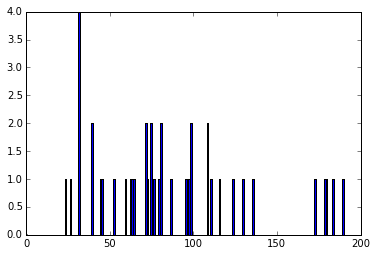

In [10]:
plt.hist(np.array(ccc) * 0.008 * 1.4, bins=200,range=(0,200))
plt.show()